In [21]:
!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
from inferenceutils import *

--2021-12-28 13:04:51--  https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2219 (2.2K) [text/plain]
Saving to: 'inferenceutils.py.1'

     0K ..                                                    100% 1.88G=0s

2021-12-28 13:04:51 (1.88 GB/s) - 'inferenceutils.py.1' saved [2219/2219]



In [22]:
output_directory = 'output/'

In [23]:
category_index = label_map_util.create_category_index_from_labelmap('hand_label_map.pbtxt', use_display_name=True)
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'./All_model/fine_tuned_model/saved_model')

In [24]:
category_index

{1: {'id': 1, 'name': 'down'},
 2: {'id': 2, 'name': 'left'},
 3: {'id': 3, 'name': 'right'},
 4: {'id': 4, 'name': 'up'}}

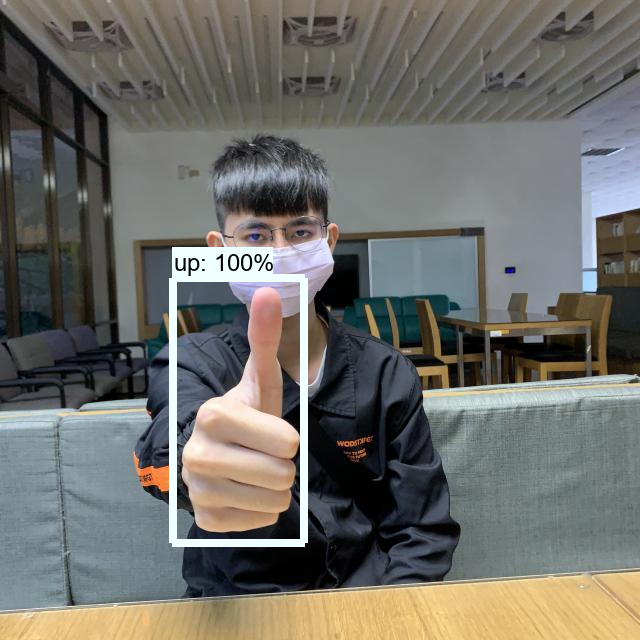

In [28]:
for i in range(1,2):
  
    image_np = load_image_into_numpy_array('./valid/IMG_2116_JPG.rf.bbcb3a371069c5a415f1bad8c3a09919.jpg')
    output_dict = run_inference_for_single_image(model, image_np)
    vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
    display(Image.fromarray(image_np))